In [608]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

%matplotlib inline

In [609]:
def region_of_interest(image, vertices):
    mask = np.zeros_like(image)
    channels_count = image.shape[-1] if len(image.shape) == 3 else 1
    match_mask_color = (255,) * channels_count

    cv.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv.bitwise_and(image, mask)

    return masked_image

In [610]:
def draw_the_lines(img_src, hough_lines_p):
    image = np.copy(img_src)
    blank_image = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)
    for line in hough_lines_p:
        for x1, y1, x2, y2 in line:
            cv.line(blank_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    img = cv.addWeighted(image, .8, blank_image, 1, 0.0)

    return img

In [611]:
img = cv.imread('images/road_2.jpg')

In [612]:
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
# plt.figure()
# plt.imshow(img)
# plt.show()

In [613]:
print(img.shape)
height = img.shape[0]
width = img.shape[1]

(720, 1280, 3)


In [614]:
region_of_interest_vertices = [
    (0, height),
    (width/2 - width*0.04, height/2 + height*0.01),
    (width, height)
]

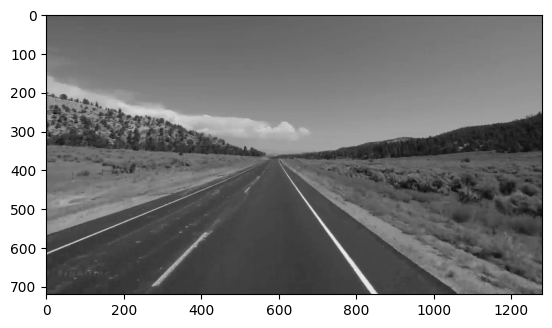

In [615]:
img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
plt.figure()
plt.imshow(img_gray, 'gray')
plt.show()

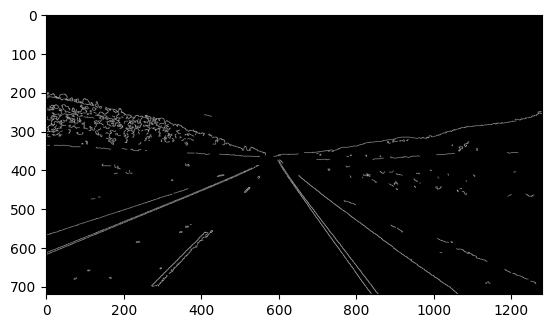

In [616]:
edges = cv.Canny(img_gray, 113, 215, apertureSize=3)
plt.figure()
plt.imshow(edges, 'gray')
plt.show()

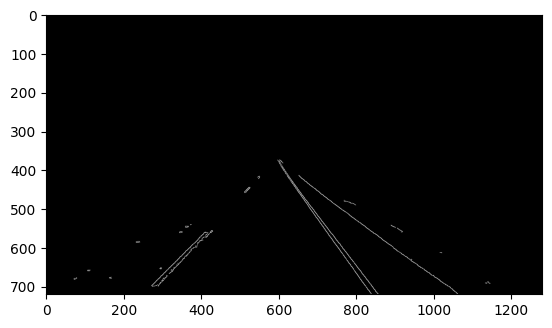

In [617]:
cropped_image = region_of_interest(edges, np.array([region_of_interest_vertices], np.int32))
plt.figure()
plt.imshow(cropped_image, 'gray')
plt.show()

In [618]:
lines = cv.HoughLinesP(cropped_image, 1, np.pi/180, 45, lines=np.array([]), minLineLength=10, maxLineGap=10)

In [619]:
image_with_lines = draw_the_lines(img, lines)

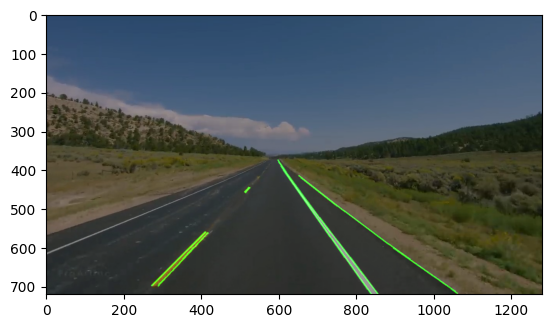

In [620]:
plt.figure()
plt.imshow(image_with_lines)
plt.show()

In [621]:
if cv.waitKey(0) & 0xFF == ord('q'):
    cv.destroyAllWindows()